In [1]:
# %load_ext autotime
%load_ext autoreload
%autoreload 2

import sys
sys.path.append("..")

In [2]:
import pandas as pd
import numpy as np

In [3]:
from experiments.run import run
from experiments.post_processing import post_process

In [4]:
results, exceptions = run()

Running experiment
Experiment complete


In [5]:
df = pd.DataFrame(results)
df = post_process(df)
df

,eth_price,eth_supply,eth_staked,supply_inflation,average_effective_balance,number_of_validators,number_of_validators_online,number_of_validators_offline,base_reward,validating_rewards,...,pool_cloud_cloud_costs,staas_full_cloud_costs,staas_self_custodied_cloud_costs,diy_hardware_third_party_costs,diy_cloud_third_party_costs,pool_staas_third_party_costs,pool_hardware_third_party_costs,pool_cloud_third_party_costs,staas_full_third_party_costs,staas_self_custodied_third_party_costs
0,0.000000,1.120000e+08,0.000000e+00,0.000000,3.200000e+10,0,0,0,0.0,0.000000e+00,...,[0],[0],[0],[0],[0],[0],[0],[0],[0],[0]
1,1000.000000,1.120000e+08,5.242880e+05,0.001040,3.200000e+10,16384,16057,327,22360.0,1.439769e+09,...,0.445645,0.0,0.0,0.0,0.0,45.939853,0.0,0.0,17.014761,13.611808
2,1014.440311,1.120000e+08,5.291187e+05,0.001044,3.199988e+10,16535,16205,330,22258.0,1.446411e+09,...,0.449752,0.0,0.0,0.0,0.0,46.818255,0.0,0.0,17.340094,13.872076
3,1011.859669,1.120000e+08,5.339494e+05,0.001049,3.199982e+10,16686,16353,333,22157.0,1.452998e+09,...,0.453859,0.0,0.0,0.0,0.0,46.91183,0.0,0.0,17.374752,13.899802
4,1014.149349,1.120000e+08,5.387801e+05,0.001054,3.199976e+10,16837,16501,336,22057.0,1.459531e+09,...,0.457966,0.0,0.0,0.0,0.0,47.229404,0.0,0.0,17.492372,13.993898
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6844,1045.017858,1.120525e+08,3.358068e+07,0.008321,3.199144e+10,1049677,1028722,20955,2793.0,1.152195e+10,...,28.551214,0.0,0.0,0.0,0.0,384.173981,0.0,0.0,142.28666,113.829328
6845,1031.983459,1.120525e+08,3.358551e+07,0.008322,3.199144e+10,1049828,1028870,20958,2793.0,1.152361e+10,...,28.555322,0.0,0.0,0.0,0.0,379.436803,0.0,0.0,140.532149,112.425719
6846,1022.291574,1.120525e+08,3.359034e+07,0.008320,3.199144e+10,1049979,1029018,20961,2792.0,1.152114e+10,...,28.559429,0.0,0.0,0.0,0.0,375.792794,0.0,0.0,139.182516,111.346013
6847,1016.560357,1.120525e+08,3.359517e+07,0.008321,3.199144e+10,1050130,1029166,20964,2792.0,1.152279e+10,...,28.563536,0.0,0.0,0.0,0.0,373.739756,0.0,0.0,138.422132,110.737706


In [6]:
df = df.drop(df.query('timestep == 0').index)

<AxesSubplot:xlabel='timestep'>

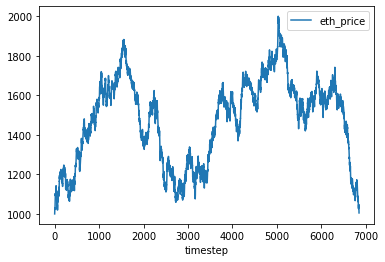

In [7]:
df.plot(x='timestep', y='eth_price')

<AxesSubplot:xlabel='timestep'>

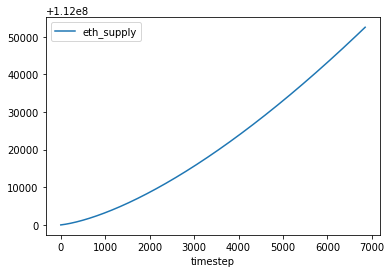

In [8]:
df.plot(x='timestep', y='eth_supply')

<AxesSubplot:xlabel='timestep'>

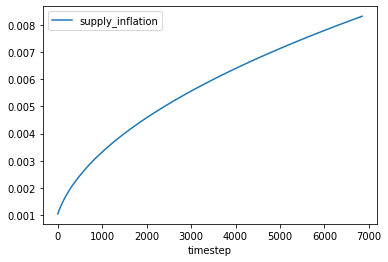

In [9]:
df.plot(x='timestep', y='supply_inflation')

<AxesSubplot:xlabel='timestep'>

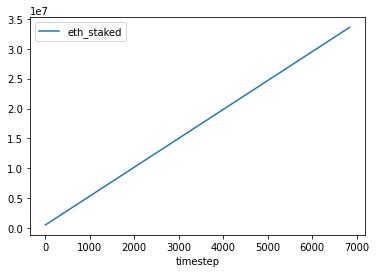

In [10]:
df.plot(x='timestep', y='eth_staked')

<AxesSubplot:xlabel='timestep'>

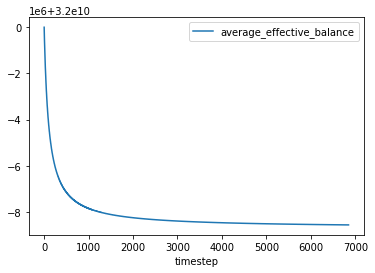

In [11]:
df.plot(x='timestep', y=['average_effective_balance'])

<AxesSubplot:xlabel='timestep'>

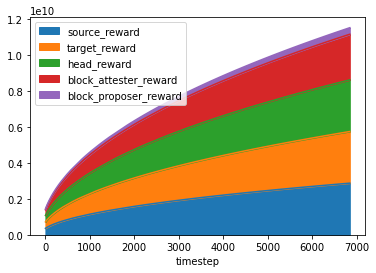

In [12]:
df.plot.area(x='timestep', y=['source_reward', 'target_reward', 'head_reward', 'block_attester_reward', 'block_proposer_reward'])

<AxesSubplot:xlabel='timestep'>

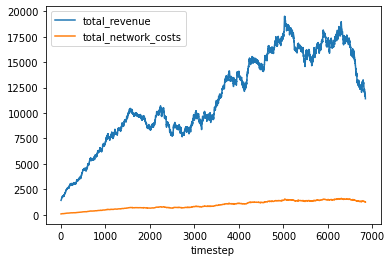

In [13]:
df.plot(x='timestep', y=['total_revenue', 'total_network_costs'])

<AxesSubplot:xlabel='timestep'>

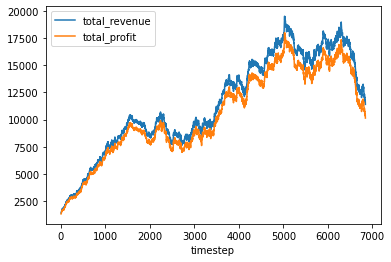

In [14]:
df.plot(x='timestep', y=['total_revenue', 'total_profit'])

<AxesSubplot:xlabel='timestep'>

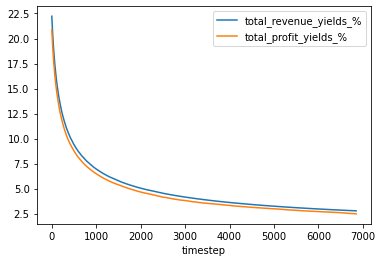

In [15]:
df['total_revenue_yields_%'] = df['total_revenue_yields'] * 100
df['total_profit_yields_%'] = df['total_profit_yields'] * 100
df.plot(x='timestep', y=['total_revenue_yields_%', 'total_profit_yields_%'])

In [16]:
from model.parameters import validator_types

hardware_costs = [validator.type + '_hardware_costs' for validator in validator_types]
cloud_costs = [validator.type + '_cloud_costs' for validator in validator_types]
third_party_costs = [validator.type + '_third_party_costs' for validator in validator_types]

<AxesSubplot:xlabel='timestep'>

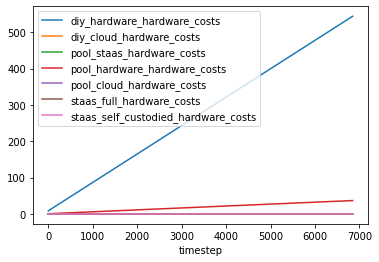

In [17]:
df.plot(x='timestep', y=[*hardware_costs])

<AxesSubplot:xlabel='timestep'>

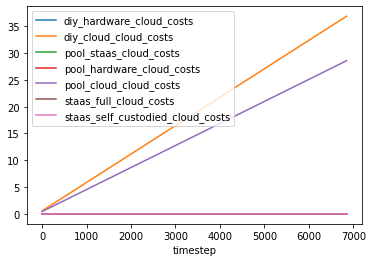

In [18]:
df.plot(x='timestep', y=[*cloud_costs])

<AxesSubplot:xlabel='timestep'>

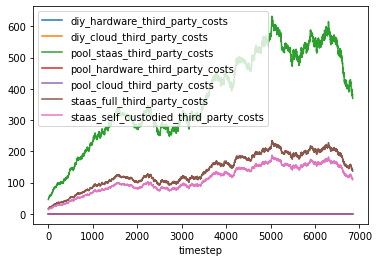

In [19]:
df.plot(x='timestep', y=[*third_party_costs])